## Проект "Анализ причин убытков развлекательного приложения Procrastinate Pro+"

**Цель проекта –** оценка окупаемости рекламной кампании приложения и определение возможных причин убытка.

**Задачи проекта:**
- обработка входных данных;
- исследовательский анализ: составление профилей пользователей;
- определение расходов на маркетинг;
- поиск зависимостей и расчет основных маркетинговых метрик.

**Входные данные** — на входе были получены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, 3 датасета (информация содержит данные с информацией о посещениях сайта, о заказах, о расходах на рекламу).

В процессе работы над проектом будут реализованы следующие **шаги:**
1. загрузка и знакомство с данными
2. предобработка данных
  - поиск и обработка пропусков и дубликатов
  - изменение типов данных и названий столбцов при необходимости
  - объединение датасетов
3. создание функций для расчета метрик и построения графиков
4. исследовательский анализ данных - определение профилей пользователей в разрезе стран, используемых устройств и источников привлечения
5. расчет расходов на маркетинг в целом по рекламной кампании и в разрезе источников привлечения, определение стоимости привлечения одного пользователя (САС), визуализация
7. оценка окупаемости рекламной кампании на основе расчета основных метрик: коверсия, удержание, LTV, ROI в общем по итогам кампании и в разрезе стран, используемых устройств и источников привлечения, визуализация
8. формулирование выводов и рекомендаций

### Загрузка и предобработка данных

In [1]:
#импортируем библиотеки

import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#загружаем данные

visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

#посмотрим как выглядят таблицы

display(visits.head())
display(orders.head()) 
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
#ознакомимся с общей информацией

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Из полученной информации видно:
1. в таблице нет пропущенных значений
2. в столбцах с датами тип данных не соответствует и их нужно изменить
3. требуется переименование названий столбцов.

In [6]:
#приведем названия столбцов к опимальному формату

visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

display(visits.head())
display(orders.head()) 
costs.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [7]:
#изменим тип данных в столбцах с датами

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
#проверим переменные на наличие явных дубликатов

display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

In [9]:
#проверим неявные дубликаты

visits['region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [10]:
visits['device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [11]:
visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [12]:
costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

**Вывод по разделу:**

Тип данных изменен.
Дубликаты не выявлены.

### Создание функций

#### Функции для вычисления значений метрик

##### Функция для создания профилей `get_profiles()`

In [13]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для расчёта Retention Rate `get_retention()`

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для расчёта конверсии `get_conversion()`

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для расчёта LTV и ROI `get_ltv()`

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков

##### Функция для сглаживания данных `filter_data()`

In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для построения графика Retention Rate `plot_retention()`

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для визуализации конверсии `plot_conversion()`

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Функция для визуализации LTV и ROI `plot_ltv_roi`

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Составление профилей пользователей. Минимальная и максимальная даты привлечения пользователей

In [21]:
# получаем профили пользователей

profiles = get_profiles(visits, orders, costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


Рассчитаем минимальную и максимальную даты привлечения.

In [22]:
print('Минимальная дата привлечения пользователей:',profiles['dt'].min())
print('Максимально возможная дата привлечения:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимально возможная дата привлечения: 2019-10-27


**Вывод:**
Ориентируясь на полученные даты можно сделать вывод, что в таблице представлены данные по привлечению пользвателей почти за 6 мес. 2019 г. с 01.05.2019 по 27.10.2019.
По условиям задачи на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Таким образом максимальная дата с учетом горизонта - 19.10.2019 г., что входит в представленные данные.

#### Анализ стран пользователей, доля платящих из каждой страны

In [23]:
profiles.groupby('region').agg({'user_id':'nunique','payer':'mean'}).sort_values(
    by='user_id',ascending=False).style.format({'payer':'{:,.2%}'.format})

,user_id,payer
region,,
United States,100002,6.90%
UK,17575,3.98%
France,17450,3.80%
Germany,14981,4.11%


**Вывод:**
В исследуемых данных предаставлены пользователи из 4 стран: США, Великобритания, Франция и Германия. Больше всего пользователей  из США и по общему количеству, и по доле платящих пользователей - около 7%.

#### Анализ используемых устройств пользователей, доля платящих для каждого устройства

In [24]:
profiles.groupby('device').agg({'user_id':'nunique','payer':'mean'}).sort_values(
    by='user_id',ascending=False).style.format({'payer':'{:,.2%}'.format})

,user_id,payer
device,,
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%
Mac,30042,6.36%


**Вывод:**
Больше всего пользователей используют мобильные приложения, на первом месте iPhone, далее Android. А вот переходят в статус платящих чуть больше яблочные пользователи (iPhone и Mac) - около 6%.

#### Анализ источников привлечения пользователей, доля платящих для каждого канала привлечения

In [25]:
print(profiles.groupby('channel').agg({'user_id':'nunique','payer':'mean'}).sort_values(
    by='user_id',ascending=False))

profiles['user_id'].nunique()

                    user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700


150008

**Вывод:**
Больше всего пользователей "органических", пришедших не из рекламных источников (38%). Если рассматривать рекламные источники, то здесь лидируют FaceBoom (19%) и TipTop (13%) по общему количеству пользователей.
Доля пользователей, перешедших в категорию "платящих" выше всего у FaceBoom (12%), а вот органические пользователи неохотно становятся плательщиками (самый низкий показатель - 2%)

### Анализ расходов на маркетинг

#### Общая сумма расходов на маркетинг

In [26]:
round(costs['costs'].sum(), 2)

105497.3

#### Распределение расходов на маркетинг по рекламным источникам

In [27]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**
Наибольшие затраты приходятся на 2 рекламных источника - TipTop, FaceBoom. При этом TipTop составляет половину от всех расходов и FaceBoom еще 30%. То есть 80% расходов направлено на 2 канала. Из предыдущих расчетов мы помним, что в FaceBoom наибольший процент перехода пользователей в категорию "платящих", однако пока рано делать вывод о том, окупаются ли вложения.

#### Визуализация динамики изменения расходов во времени по каждому источнику

In [28]:
#добавим столбцы в таблицу costs с указанием месяца и недели

costs['dt'] = pd.to_datetime(costs['dt'])

costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

costs.head(5)

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


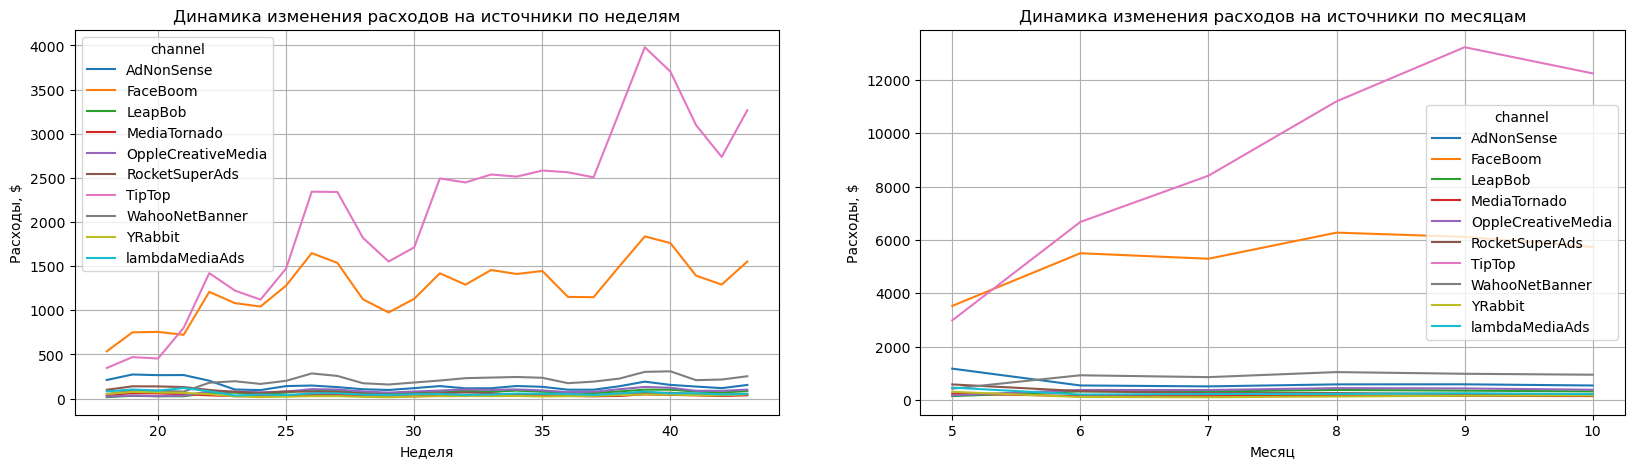

In [29]:
#строим графики

plt.figure(figsize=(20, 5))
 
costs.pivot_table(index='week',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов на источники по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы, $')
 
costs.pivot_table(index='month',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))

plt.title('Динамика изменения расходов на источники по месяцам')

plt.xlabel('Месяц')
plt.ylabel('Расходы, $')

plt.show()

**Вывод:**
Как и ранее мы видим, что наибольшие расходы приходятся на FaceBoom и TipTop. При этом затраты в динамике увеличиваются. По остальным каналам расходы примерно одинаковые и не превышают 200$ в неделю.

####  Cтоимость привлечения одного пользователя (CAC) из каждого источника

In [30]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean').round(2).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.22


**Вывод:**
Самый дорогой пользователь из канала TipTop, этого следовало ожидать, ведь на этот источник тратится половина всего бюджета. А вот пользователи из FaceBoom обходятся намного дешевле, несмотря на то, что затраты на данный источник также высоки.
Оправданы ли все эти масштабные вложения мы узнаем, рассчитав окупаемость.

### Оценка окупаемости рекламы

Условие - на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

####  Общая окупаемость рекламы (LTV, CAC и ROI)

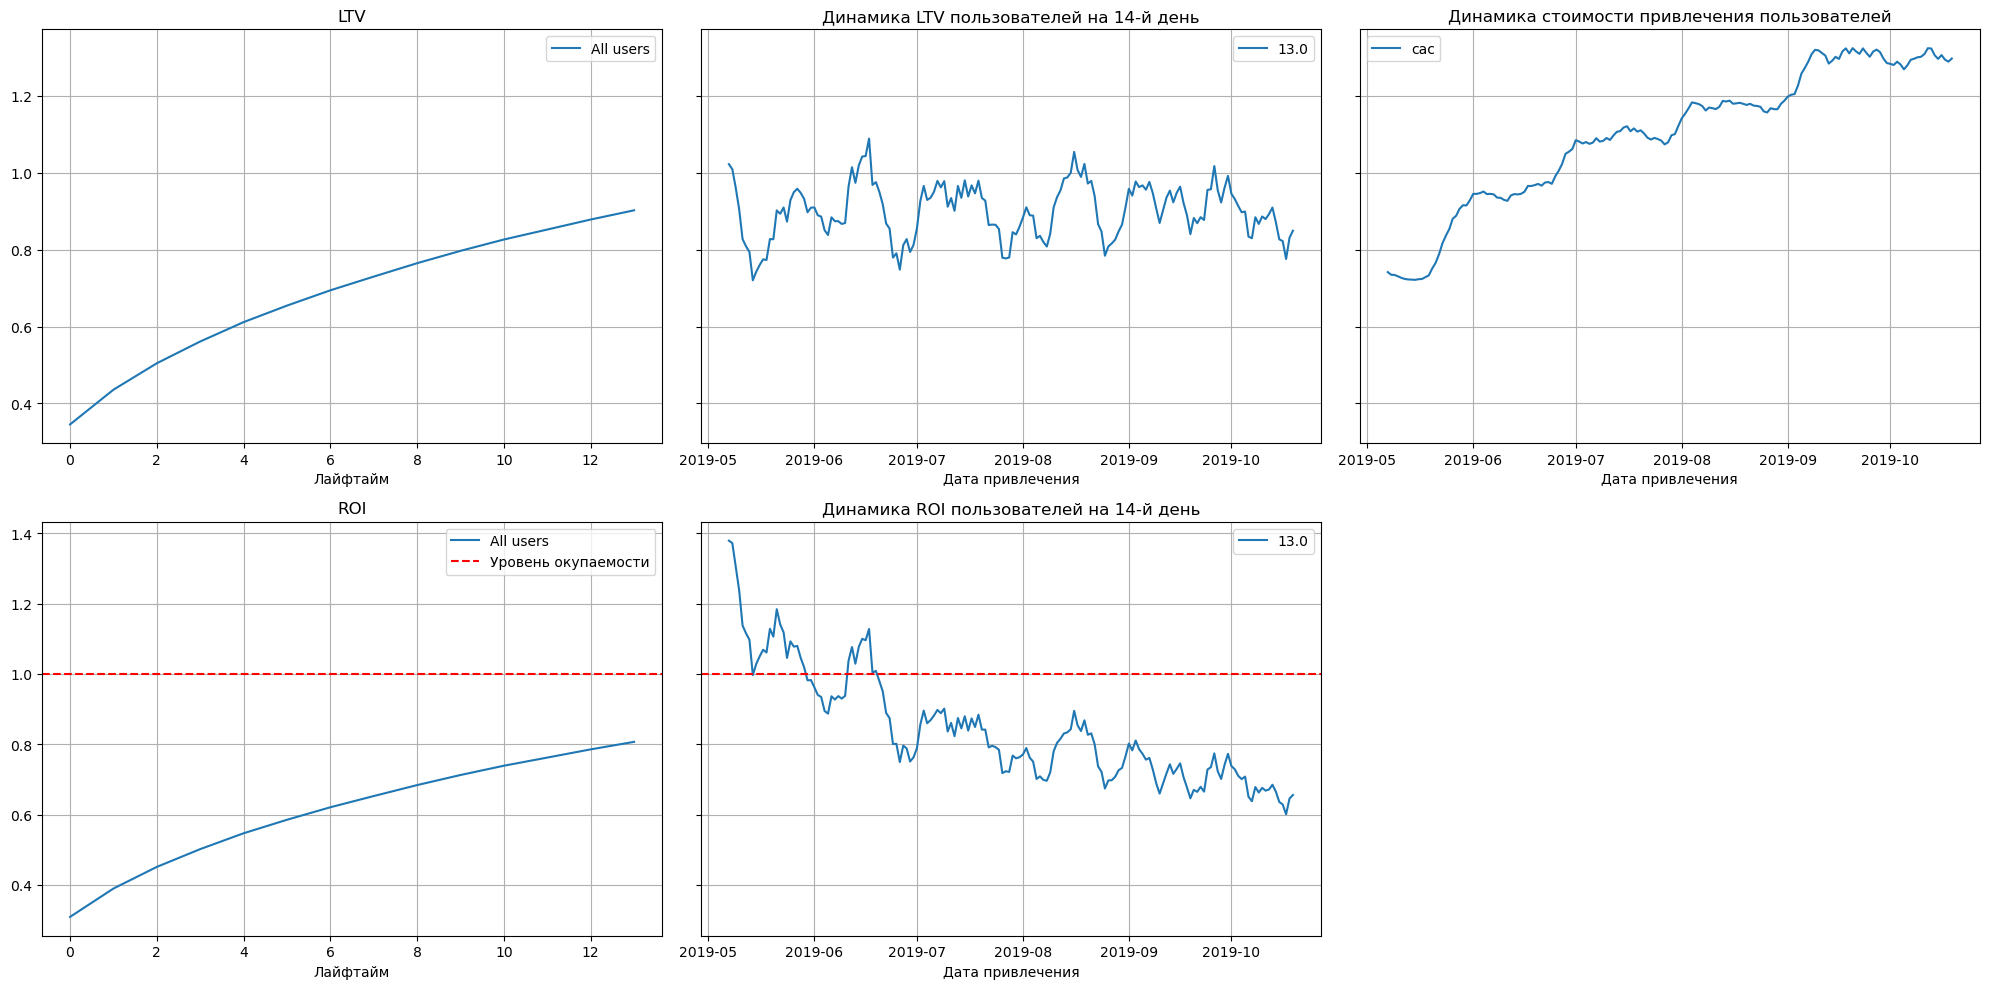

In [31]:
# сначала посмотрим общую картину по метрикам без разбивок
# исключим "органику", т.к. на них деньги не тратили, а количество платящих из этого источника исказят результат

profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


**Вывод:**
По графикам можно сделать такие выводы:
- Кривая LTV плавно растёт, что говорит о том, что мы правильно задали параметры, в динамике достаточно стабилен;
- При этом CAC растет, что говорит о росте конкуренции на канале или увеличением бюджета по каналу;
- Реклама не окупается. ROI в конце 2 недели — чуть выше 80%, а в динамике мы видим, что ROI падает.

####  Конверсия и удержание

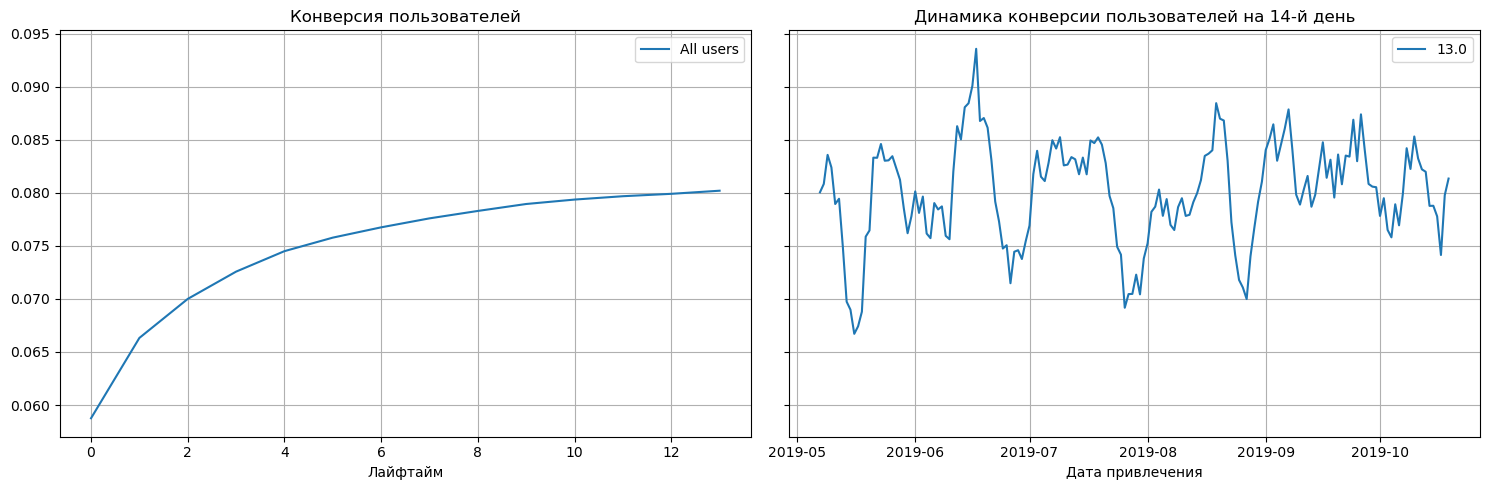

In [32]:
# конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

#строим графики
plot_conversion(conversion_grouped, conversion_history,horizon_days)

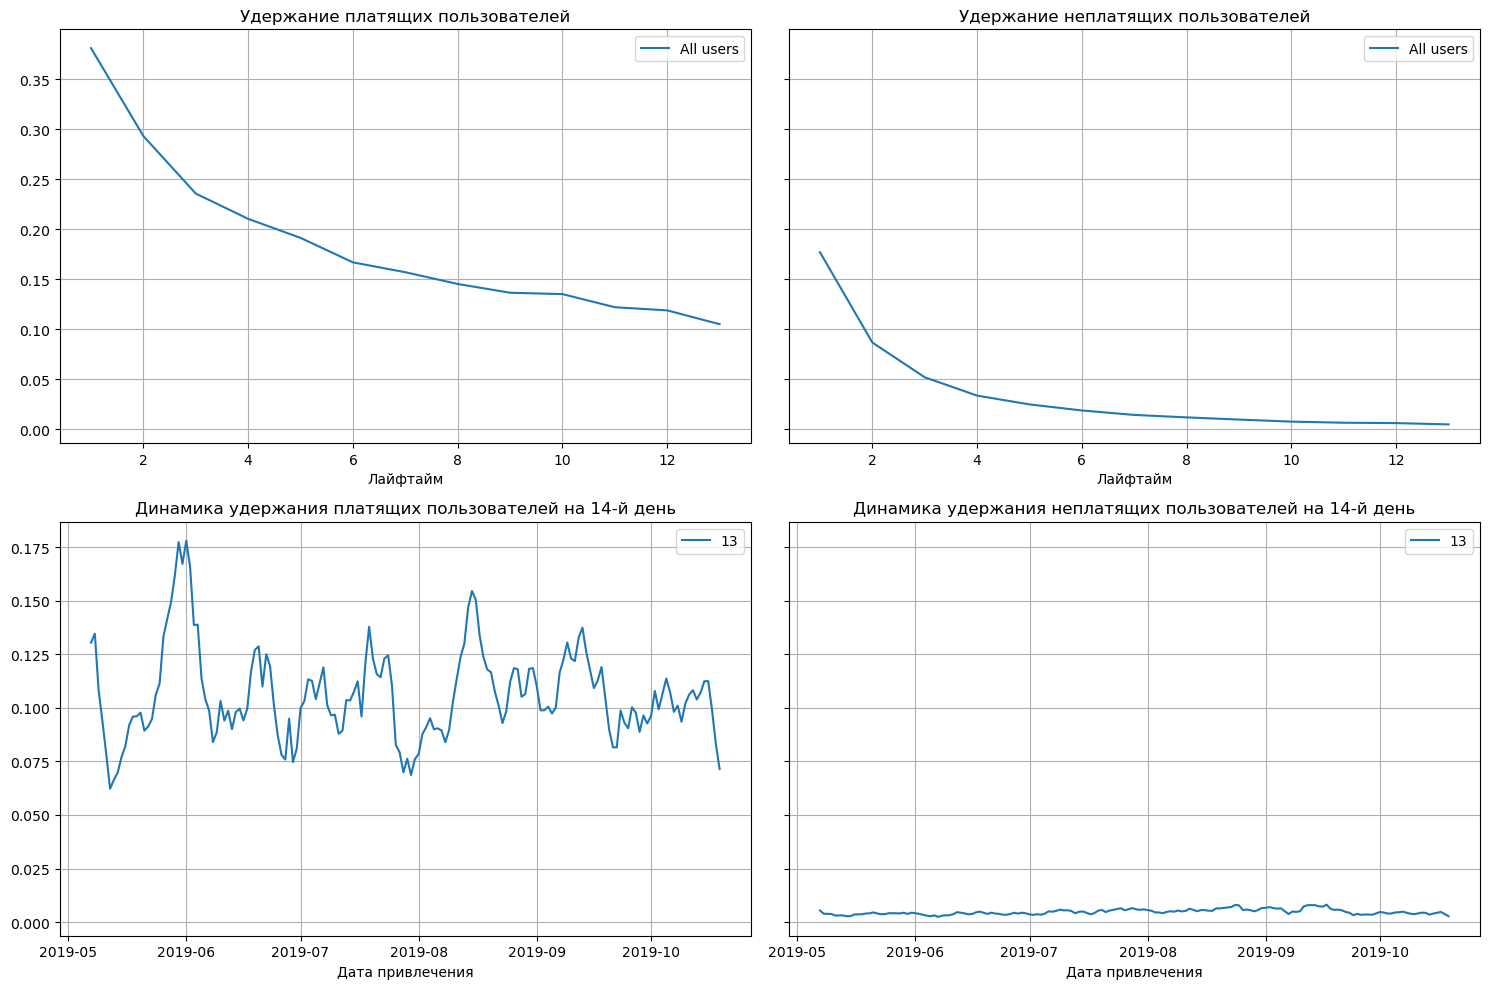

In [33]:
#удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
- Конверсия растет в первые дни активно, но, начиная примерно с 5 дня рост замедляется и к 14 дню практически стабилизировалась на 80%;
- Удержание платящих пользователей с самого начала не выше 40%, а концу 2 недели падает до 10%, по неплатящим пользователям -  удержание вовсе с 17% в начале и к концу 2 недели приближаеся к 0.

####  Анализ окупаемости рекламы с разбивкой по устройствам

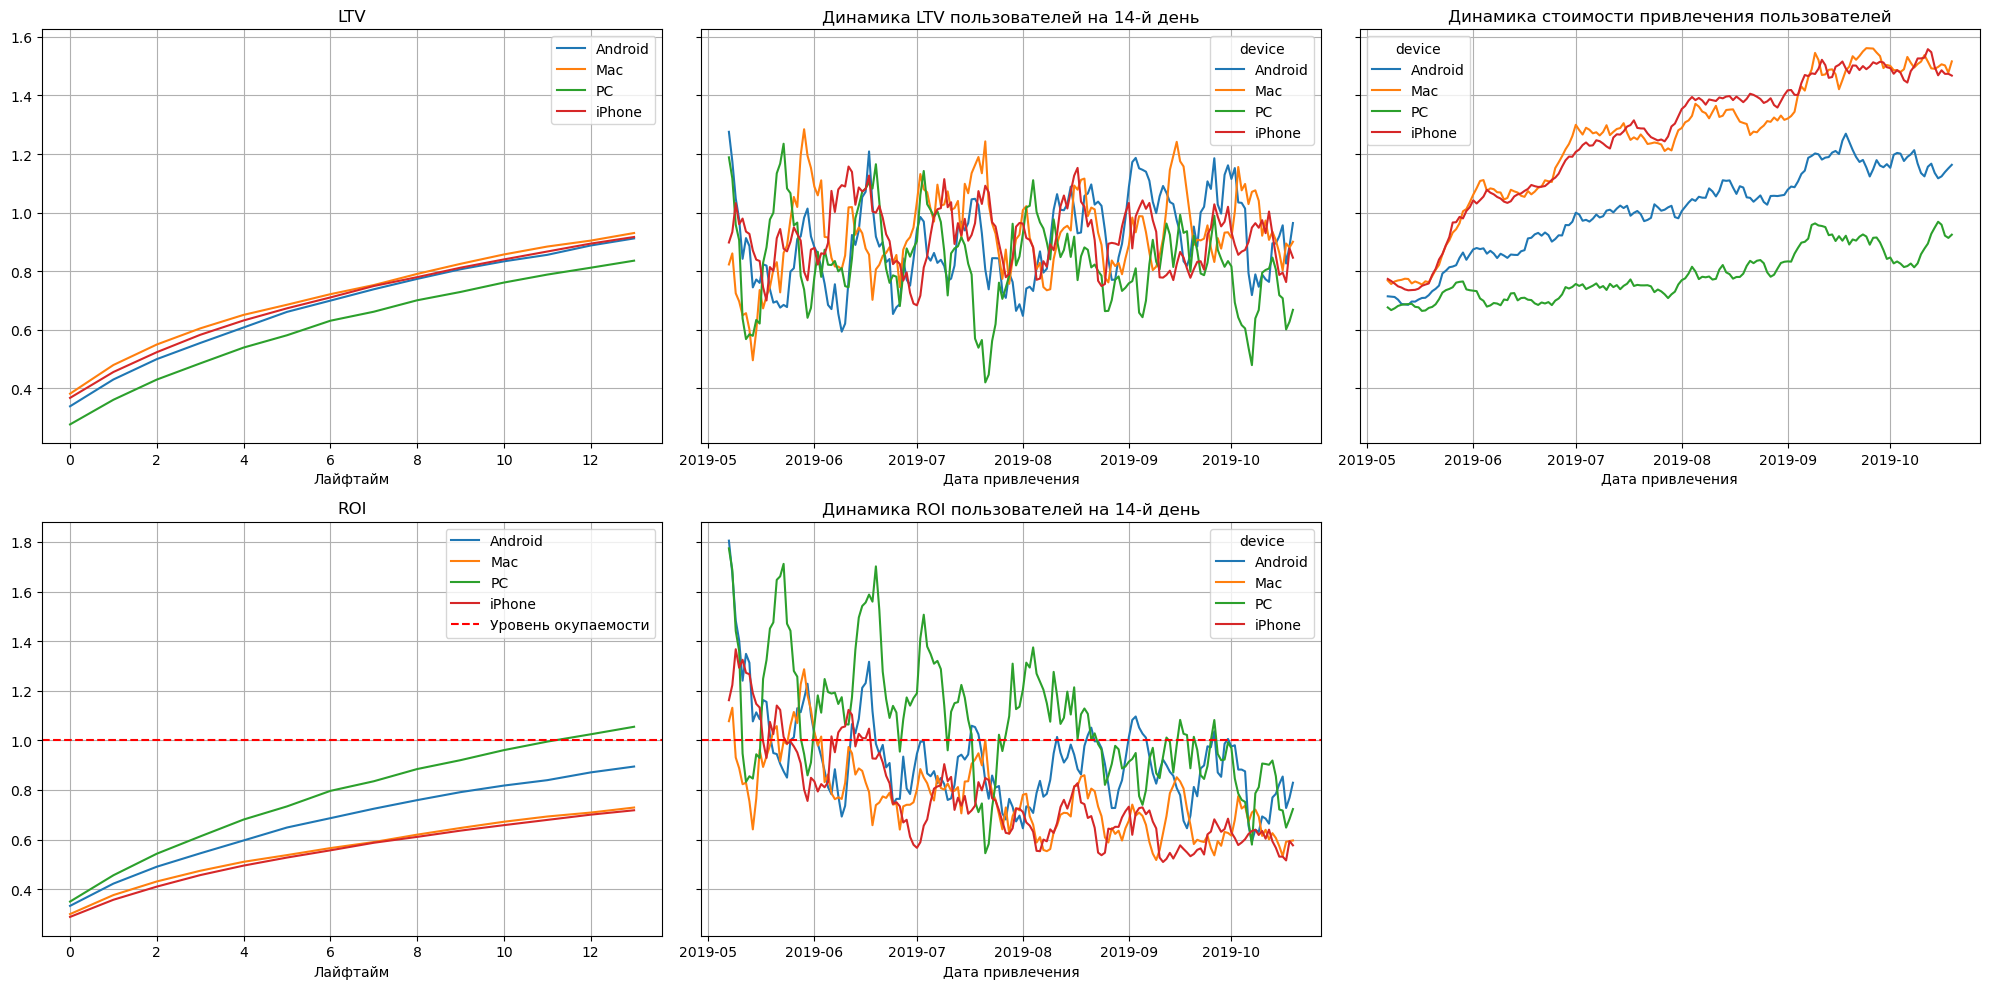

In [34]:
 dimensions=['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Из графиков видно, что LTV у 3-х устройств примерно одинаковый и одинаково плавно возрастает, у PC чуть ниже.
При этом CAC также у PC ниже, чем у остальных устройств. Наибольшие вложения в рекламу были в яблочные девайсы. Android занял серединное значение.
Естественно тогда выглядит график ROI. Невысокие, только немного увеличивающиеся, вложения в PC позволили окупить рекламу по этому устройсту. Это единственная кривая, которая пересекла уровень окупаемости в 1. Наиболее низкий ROI у Mac и iPhone. По ним были большие вложения, которые в динамике также сильно увеличивались, но эти вложения не окупились.И окупившийся бюджет по PC также не смог перекрыть затраты в общем.

#### Анализ окупаемости рекламы с разбивкой по странам

In [ ]:
 dimensions=['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Однозначно, маркетологи сделали ставку только на один регион - США, направив туда львиную долю бюджета, даже немного сократив по остальным регионам. При этом мы видим, что LTV по США действительно выше, чем в других регионах, но этого оказалось недостаточно. Полученные средства от этого региона не смогли покрыть затраты. ROI по США значительно ниже других регионов. Более того он перечеркнул окупаемость всех 3-х регионов.

####  Анализ окупаемости рекламы с разбивкой по рекламным каналам

In [ ]:
 dimensions=['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**
Здесь похожая ситуация, также мы видим большие вложения в 1 канал - TipTop, по нему также LTV выше остальных, но реклама не окупилась.Также не окупилась реклама и по FaceBoom, на который также затраты были выше остальных каналов, но в отличие от TipTop стабильно высокие в динамике (без изменений и доп.вложений). Следует отметить канал lambdaMediaAds, вложения в рекламу по нему достаточно низкие, а LTV самый высокий, реклама окупилась, однако из-за небольшого общего количества пользователей, пришедших из этого канала, на общую картину это не повлияло.

#### Расчет конверсии и удержания по устройствам

In [ ]:
# конверсия

dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_conversion(conversion_grouped, conversion_history,horizon_days)

In [ ]:
#удержание пользователей

dimensions=['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Пользователи Mac и iPhone конвертируются лучше других, чуть отстает Android, а конверсия PC значительно ниже. А вот удержание имеет обратную картину - графики плавные, но у PC выше всех, чуть хуже Android, яблочники на последнем месте.

#### Расчет конверсии и удержания  по странам

In [ ]:
# конверсия

dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_conversion(conversion_grouped, conversion_history,horizon_days)

In [ ]:
#удержание пользователей

dimensions=['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Пользователи из США конвертируются намного лучше остальных стран. Здесь следует обратить внимание на то, что конверсия в мае по 3 другим регионам была выше, чем в США, а дальше упала. Если мы вспомним график САС, то как раз в этот период (с июня) рекламный бюджет был снижен по 3 странам, а в США наоборот резко увеличен, что могло также повлиять на изменение конверсии.
Что касается удержания, то здесь картина аналогична устройствам - пользователи из США удерживаются хуже, хотя график более плавный. В динамике видно, что по 3 регионам есть периоды, когда не было привлеченных пользователей.

#### Расчет конверсии и удержания по каналам

In [ ]:
# конверсия

dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_conversion(conversion_grouped, conversion_history,horizon_days)

In [ ]:
#удержание пользователей

dimensions=['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions)

#строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Самая высокая конверсия канала FaceBoom	(2 место по расходам на рекламу), а у TipTop (лидер по расходам) конверсия только на 4 месте. Следует отметить еще 2 канала с высокой конверсией - lambdaMediaAds и AdNonSense, хотя у lambdaMediaAds она очень нестабильная.
Что касается удержания, то здесь мы видим, что у лидеров по конверсии (FaceBoom и AdNonSense) удержание в самом конце списка. У lambdaMediaAds и TipTop удержание намного выше, но в с лучае с TipTop расходы все равно перевесили, а по lambdaMediaAds есть большой промежуток вообще отсутствия привлечения пользователей.

### Общий вывод

Рекламная кампания не окупилась. Основная причина этого, большие вложения (быстро растущий бюджет) в отдельные направления: в 1 регион (США), источник (iPhone, Mac), в отдельные каналы(TipTop и FaceBoom) и именно на привлечение пользователей. Это дало эффект в конверсии, но на удержание не повлияло. При этом следует отметить, что и 2 канала с бОльшим бюджетом, и яблочные устройства в основном используются как раз пользователями из США.
По всем напрвлениям реклама перестала окупаться, начиная с июня, когда был резко увеличен бюджет и, соответственно, САС.

**Рекомендации для отдела маркетинга:**

- Перепрофилировать бюджет, направить средства на удержание пользователей, ведь основная проблема - при высокой конверсии крайне низкое удержание по выбранным направлениям;
- Обратить внимание на устройство PC - единственное, которое окупается, а также Android, у которого и конверсия, и удержание выше остальных;
- Обратить внимание на канал lambdaMediaAds - значения по всем метрикам высокие при невысоком бюджете на рекламу, кампания по привлечению пользователей може иметь положительный эффект;
- Продолжать работу с каналом TipTop, но сократить расходы на рекламу - крайне низкий ROI только из-за объема расходов, остальные метрики в норме;
- Сократить рекламные затраты по региону США, рассмотреть другие регионы, конверсия по ним снизилась при сокращении бюджета, сократить расходы по каналу FaceBoom, реклама по нему не окупается;
- Проводить промежуточные срезы по метрикам перед очередным увеличением/сокращением бюджета на рекламу, более плано увеличивать расходы, в случае отсутствия эффекта - стабилизировать.